In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

from matplotlib import pyplot

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


In [9]:
df = pd.read_csv('tjrs_year_month.csv')
df['yearMonth'] = pd.to_datetime(df['yearMonth'],format='%Y-%m-%d')

In [10]:
df.dtypes

yearMonth    datetime64[ns]
count                 int64
dtype: object

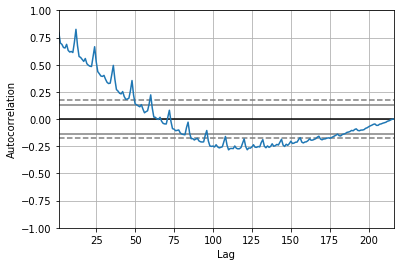

In [12]:
autocorrelation_plot(df.set_index("yearMonth"))
pyplot.show()

In [13]:
model = ARIMA(df.set_index("yearMonth"), order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  215
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2218.926
Method:                       css-mle   S.D. of innovations           7328.768
Date:                Fri, 17 Apr 2020   AIC                           4451.852
Time:                        16:14:50   BIC                           4475.446
Sample:                    02-01-2000   HQIC                          4461.385
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           156.0440    171.282      0.911      0.362    -179.663     491.751
ar.L1.D.count    -0.4956      0.066     -7.547      0.000      -0.624      -0.367
ar.L2.D.count    -0.5078      0.070     

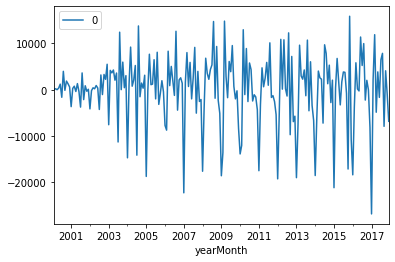

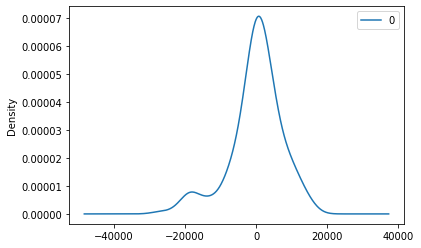

                  0
count    215.000000
mean       8.754932
std     7345.906047
min   -26860.350339
25%    -2552.112735
50%      637.067077
75%     4005.029196
max    15888.509706


In [15]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


predicted=38403.460989, expected=37043.000000
predicted=37403.210608, expected=34255.000000
predicted=31490.890358, expected=17173.000000
predicted=14367.099696, expected=24373.000000
predicted=19206.904179, expected=42825.000000
predicted=37344.124851, expected=37704.000000
predicted=38822.001940, expected=45831.000000
predicted=55335.715080, expected=40870.000000
predicted=46028.291661, expected=32243.000000
predicted=32390.266855, expected=45656.000000
predicted=44804.036078, expected=34618.000000
predicted=31904.240080, expected=43379.000000
predicted=44476.772339, expected=37585.000000
predicted=38680.174153, expected=32612.000000
predicted=31567.941780, expected=16343.000000
predicted=14310.224832, expected=21962.000000
predicted=14255.743076, expected=38792.000000
predicted=32924.930955, expected=39893.000000
predicted=41549.086425, expected=38117.000000
predicted=46808.648471, expected=39811.000000
predicted=44942.407151, expected=31737.000000
predicted=31034.861325, expected=4

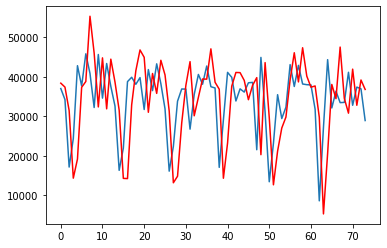

In [67]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



series = df.set_index("yearMonth")
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

#train_data, test_data = train_test_split(df.set_index("yearMonth"), test_size=0.2)

size = int(len(df.set_index("yearMonth")) * 0.66)
train_data, test_data = df.set_index("yearMonth")[0:size], df.set_index("yearMonth")[size:len(df.set_index("yearMonth"))]

scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [72]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [73]:
lstm_model.fit_generator(generator,epochs=20)


Epoch 1/20
130/130 [==============================] - 1s 12ms/step - loss: 0.0512
Epoch 2/20
130/130 [==============================] - 1s 10ms/step - loss: 0.0308
Epoch 3/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0267
Epoch 4/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0251
Epoch 5/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0251
Epoch 6/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0257
Epoch 7/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0241
Epoch 8/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0215
Epoch 9/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0180
Epoch 10/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0150
Epoch 11/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0152
Epoch 12/20
130/130 [==============================] - 1s 8ms/step - loss: 0.0128
Epoch 13/20
130/130 [==

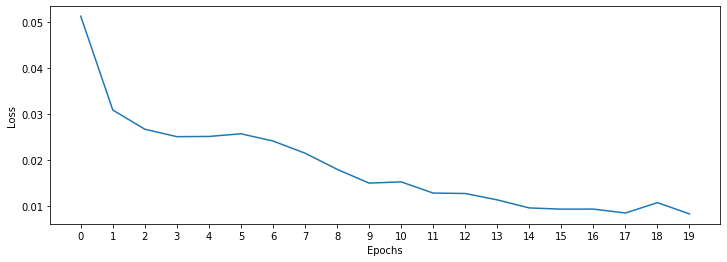

In [74]:
import matplotlib.pyplot as plt
import numpy as np

losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [75]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [76]:
lstm_predictions_scaled

[array([0.82241946], dtype=float32),
 array([0.74718994], dtype=float32),
 array([0.46728465], dtype=float32),
 array([0.57987314], dtype=float32),
 array([0.78038275], dtype=float32),
 array([0.78271425], dtype=float32),
 array([0.80594325], dtype=float32),
 array([0.84547246], dtype=float32),
 array([0.7951247], dtype=float32),
 array([0.8721967], dtype=float32),
 array([0.8389194], dtype=float32),
 array([0.8087499], dtype=float32),
 array([0.7999919], dtype=float32),
 array([0.7370536], dtype=float32),
 array([0.4943471], dtype=float32),
 array([0.57392526], dtype=float32),
 array([0.7535206], dtype=float32),
 array([0.7719733], dtype=float32),
 array([0.7887143], dtype=float32),
 array([0.8084983], dtype=float32),
 array([0.7914931], dtype=float32),
 array([0.8238654], dtype=float32),
 array([0.81152034], dtype=float32),
 array([0.79521424], dtype=float32),
 array([0.7852302], dtype=float32),
 array([0.73057365], dtype=float32),
 array([0.51879144], dtype=float32),
 array([0.57260

In [77]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions


array([[37723.22212923],
       [34273.64746392],
       [21438.87032324],
       [26601.50317371],
       [35795.6707294 ],
       [35902.5791142 ],
       [36967.72181559],
       [38780.2939527 ],
       [36471.64843428],
       [40005.7063055 ],
       [38479.8102212 ],
       [37096.41856432],
       [36694.82884347],
       [33808.85454237],
       [22679.79171658],
       [26328.76872206],
       [34563.93395686],
       [35410.06424391],
       [36177.70503831],
       [37084.88210118],
       [36305.12542403],
       [37789.52467823],
       [37223.45358133],
       [36475.75356758],
       [36017.94647872],
       [33511.72433853],
       [23800.66255903],
       [26268.13737917],
       [33740.80006897],
       [35012.54959214],
       [35667.8458432 ],
       [36216.25830746],
       [36004.64989185],
       [36689.98850322],
       [36451.03257513],
       [36013.11707091],
       [35557.89003921],
       [33340.4047178 ],
       [24798.47779465],
       [26358.12233829],


In [78]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data


,count,LSTM_Predictions
yearMonth,,
2011-11-01,37043,37723.222129
2011-12-01,34255,34273.647464
2012-01-01,17173,21438.870323
2012-02-01,24373,26601.503174
2012-03-01,42825,35795.670729
...,...,...
2017-08-01,41154,35508.106415
2017-09-01,32806,35455.108653
2017-10-01,37405,35267.152583


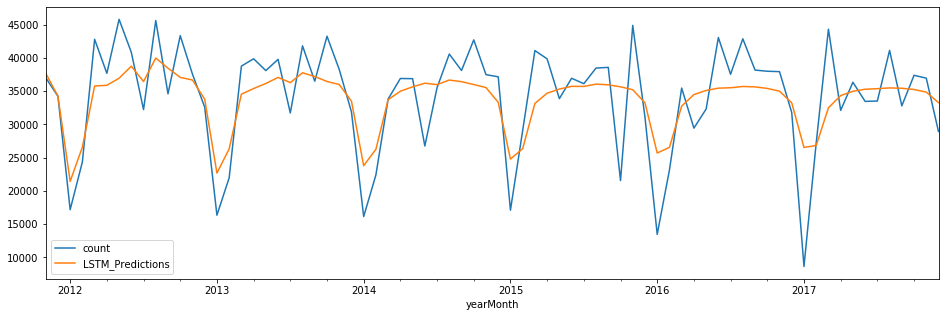

In [79]:
test_data['count'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [80]:
from statsmodels.tools.eval_measures import rmse

lstm_rmse_error = rmse(test_data['count'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['count'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 27961435.837455925
RMSE Error: 5287.857395718603
Mean: 26044.75
